<a href="https://colab.research.google.com/github/gustavonaumann/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_de_Milao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Milão*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Milão, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://data.insideairbnb.com/italy/lombardy/milan/2024-06-22/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de identificação da propriedade imóvel
* `name` - nome da propriedade
* `host_id` - número de identificação do anfitrião
* `host_name` - nome do anfitrião
* `neighbourhood_group` - não possui valor válido
* `neighbourhood` - bairro onde a propriedade está localizada
* `latitude` - latitude da propriedade
* `longitude` - longitude da propriedade
* `room_type` - tipo de quarto oferecido na propriedade
* `price` - diária da propriedade, em euros
* `minimun_nights` - número mínimo de noites para alugar
* `number_of_reviews` - número de avaliações
* `last_review` - data da última avaliação
* `reviews_per_month` - número de avaliações por mês
* `calculated_host_listings_count` - quantidade de propriedades do anfitrião
* `availability_365` - número de dias em que a propriedade está disponível dentro de 365 dias
* `number_of_reviews_ltm` - número de avaliações nos últimos 12 meses
* `license` - código de licença

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6400,The Studio Milan,13822,Francesca,NaN,TIBALDI,45.44119,9.17813,Private room,100.0,4,10,2019-04-13,0.06,1,358,0,NaN
1,23986,""" Characteristic Milanese flat""",95941,Jeremy,NaN,NAVIGLI,45.44806,9.17373,Entire home/apt,180.0,1,27,2024-04-20,0.18,1,343,2,NaN
2,40470,Giacinto Cosy & clean flat near MM1,174203,Giacinto,NaN,VIALE MONZA,45.52023,9.22747,Entire home/apt,95.0,3,42,2024-02-29,0.26,2,353,2,NaN
3,46536,Nico & Cinzia's Pink Suite!,138683,Nico&Cinzia,NaN,VIALE MONZA,45.52276,9.22478,Entire home/apt,110.0,3,36,2024-05-12,0.24,1,3,6,NaN
4,59226,Near Piazza Gae Aulenti silent e reserved flat,244087,Francesca,NaN,CENTRALE,45.48201,9.19809,Entire home/apt,180.0,3,9,2022-06-13,0.06,1,177,0,NaN


### **1. Tipos das variáveis e número de entradas do conjunto de dados**

In [6]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# identificar qual o tipo de cada variável

display(df.dtypes)

Entradas:	 24346
Variáveis:	 18



,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **2. Porcentagem de valores ausentes no *dataset***

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)


,0
neighbourhood_group,1.000000
license,0.639735
reviews_per_month,0.174936
last_review,0.174936
price,0.050563
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
name,0.000000


### **3. Tipo de distribuição das variáveis**

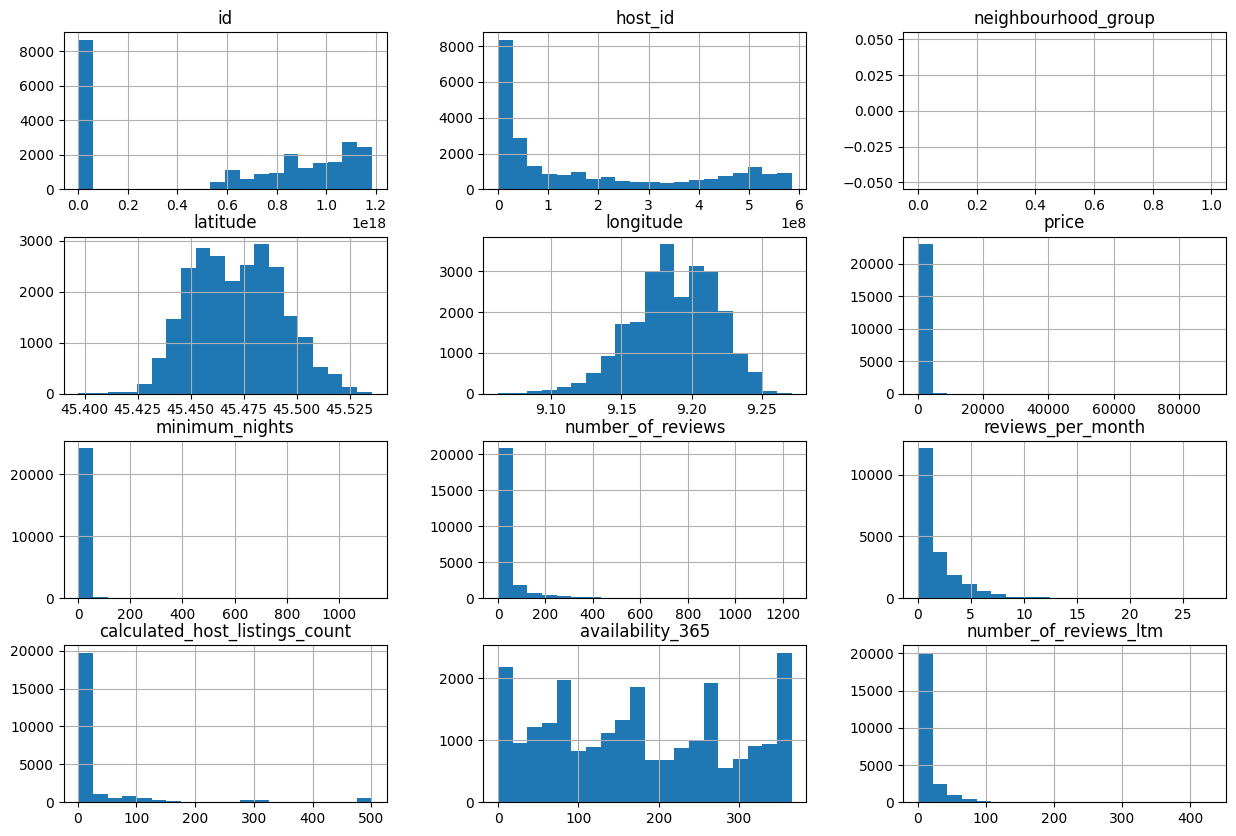

In [8]:
# plotar o histograma das variáveis numéricas (nomeá-lo apenas para esconder parte do output)

hist_dirty = df.hist(bins=20, figsize=(15,10))

### **Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights`,  `calculated_host_listings_count` e `number_of_reviews_ltm`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [23]:
# ver o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,23115.000000,24346.000000,24346.000000,20087.000000,24346.000000,24346.000000,24346.000000
mean,177.957690,3.991374,34.109751,1.708054,31.790684,176.303992,11.647909
std,924.445547,17.786521,76.036164,2.005475,86.550370,114.096537,20.024466
min,12.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,80.000000,1.000000,1.000000,0.330000,1.000000,79.000000,0.000000
50%,109.000000,2.000000,8.000000,0.960000,2.000000,170.000000,3.000000
75%,163.000000,2.000000,31.000000,2.350000,12.000000,269.000000,14.000000
max,90000.000000,1125.000000,1238.000000,27.690000,501.000000,365.000000,431.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 163, porém seu valor máximo é 90000.
* A quantidade mínima de noites (`minimum_nights`) e de avaliações nos últimos 12 meses (`number_of_reviews_ltm`) está acima de 365.
* O maior número de `calculated_host_listings_count` está 501, muito acima do que um anfitrião poderia gerenciar.

Portanto, em seguida, iremos analisar cada variável e limpar os dados, ou seja, retirar esses *outliers* que atrapalham a análise.

#### Boxplot para `minimum_nights`:


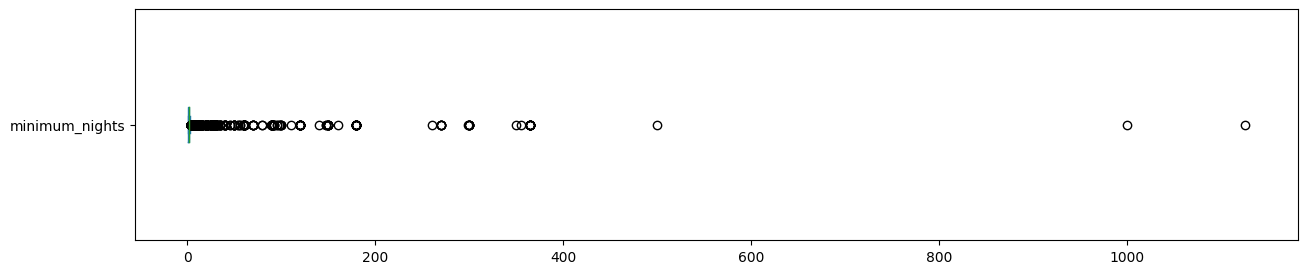

minimum_nights: valores acima de 30:
248 entradas
1.0186%


In [10]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de n dias para minimum_nights

n = 30
print(f"minimum_nights: valores acima de {n}:")
print("{} entradas".format(len(df[df.minimum_nights > n])))
print("{:.4f}%".format((len(df[df.minimum_nights > n]) / df.shape[0])*100))

#### Boxplot para `price`:

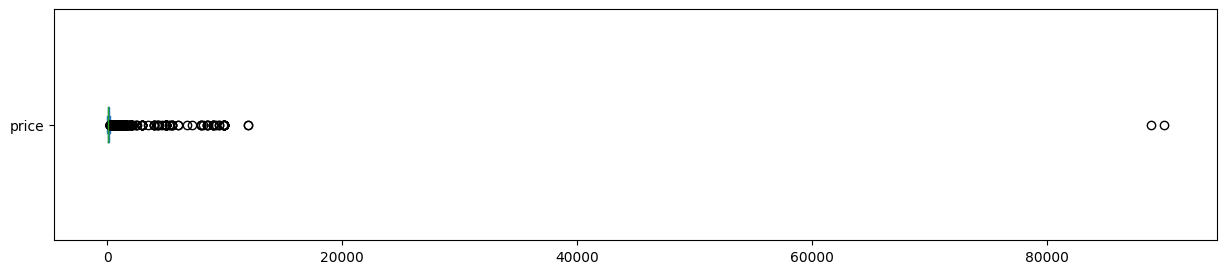


price: valores acima de 1000
174 entradas
0.7147% 


In [11]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de p euros

p = 1000
print(f"\nprice: valores acima de {p}")
print("{} entradas".format(len(df[df.price > p])))
print("{:.4f}% ".format((len(df[df.price > p]) / df.shape[0])*100))

#### Boxplot para `calculated_host_listings_count`:

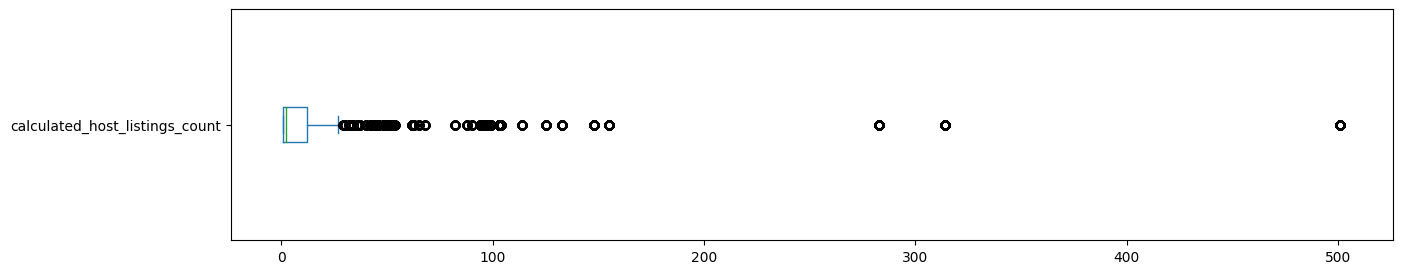


calculated_host_listings_count: valores acima de 200
1098 entradas
4.5100%


In [12]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de c propriedades

c = 200
print(f"\ncalculated_host_listings_count: valores acima de {c}")
print("{} entradas".format(len(df[df.calculated_host_listings_count > c])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > c]) / df.shape[0])*100))

#### Boxplot para `number_of_reviews_ltm`:

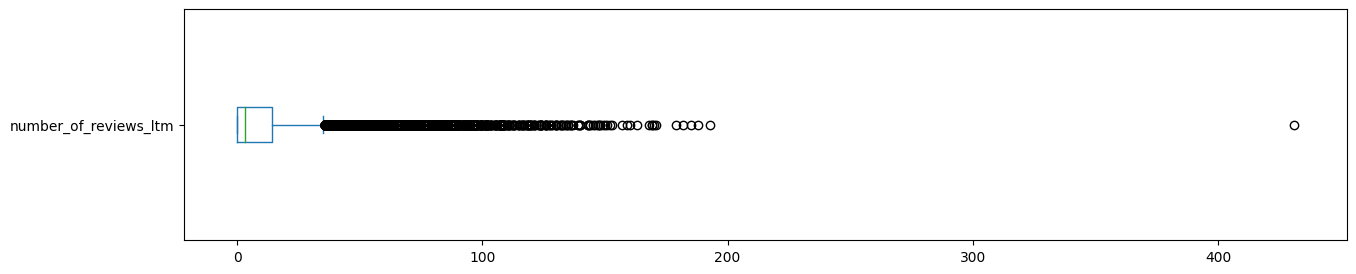


cnumber_of_reviews_ltm: valores acima de 100
183 entradas
0.7517%


In [13]:
# price
df.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de r avaliações nos últimos 12 meses

r = 100
print(f"\ncnumber_of_reviews_ltm: valores acima de {r}")
print("{} entradas".format(len(df[df.number_of_reviews_ltm > r])))
print("{:.4f}%".format((len(df[df.number_of_reviews_ltm > r]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`, `minimum_nights`, `calculated_host_listings_count` e `number_of_reviews_ltm` vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

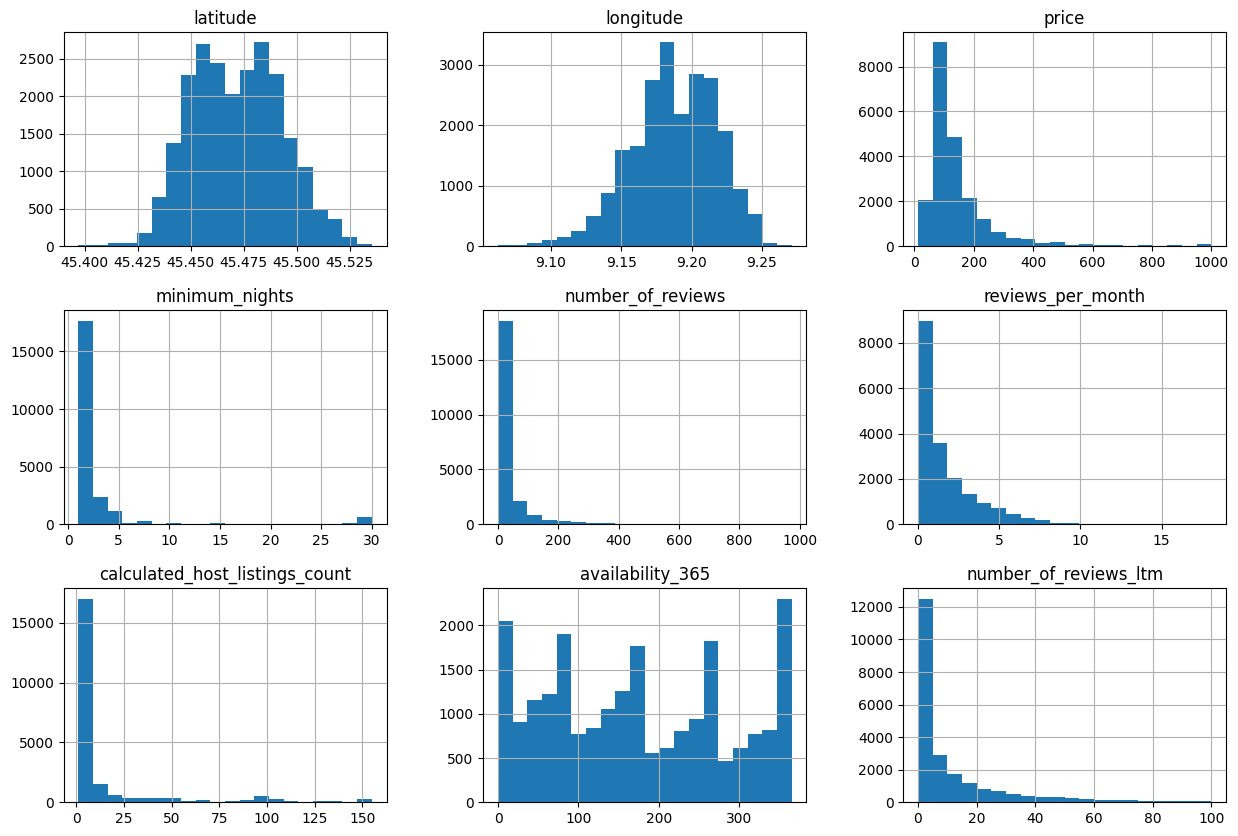

In [14]:
# remover os *outliers* em um novo DataFrame

df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > p].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > n].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > c].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > r].index, axis=0, inplace=True)


# remover `neighbourhood_group`,`id` e `host_id` pois não são relevantes em uma análise numérica

df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('id', axis=1, inplace=True)
df_clean.drop('host_id', axis=1, inplace=True)


# plotar o histograma para as variáveis numéricas

df_clean.hist(bins=20, figsize=(15,10));

Após limpar o DataFrame tirando os *outliers*, podemos novamente utilizar o comando `describe()` para visualizar os dados limpos:

In [15]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,21468.000000,22649.000000,22649.000000,18663.000000,22649.000000,22649.000000,22649.000000
mean,146.680781,2.885955,32.837211,1.689124,14.871076,174.559760,11.191752
std,124.328210,5.149489,69.479946,1.901846,31.227634,114.136625,17.721418
min,12.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,80.000000,1.000000,1.000000,0.330000,1.000000,77.000000,0.000000
50%,109.000000,2.000000,8.000000,0.980000,2.000000,167.000000,3.000000
75%,163.000000,2.000000,32.000000,2.380000,8.000000,269.000000,14.000000
max,1000.000000,30.000000,973.000000,18.060000,155.000000,365.000000,100.000000


### **4. Correlação existente entre as variáveis**

Para identificar as correlações existentes entre as variáveis de interesse:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [16]:
# criar e mostrar a matriz de correlação

corr = df_clean[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.106868,-0.029444,-0.020617,0.010188,0.022735,-0.014343,-0.008013,0.021523
longitude,0.106868,1.000000,-0.014294,0.002627,0.021322,0.025487,0.023920,-0.009770,0.020705
price,-0.029444,-0.014294,1.000000,-0.084284,-0.091150,-0.101300,0.013049,0.072198,-0.121977
minimum_nights,-0.020617,0.002627,-0.084284,1.000000,-0.083058,-0.168043,0.176364,-0.039708,-0.137821
number_of_reviews,0.010188,0.021322,-0.091150,-0.083058,1.000000,0.424805,-0.068036,-0.079213,0.677803
reviews_per_month,0.022735,0.025487,-0.101300,-0.168043,0.424805,1.000000,-0.089035,-0.063557,0.749631
calculated_host_listings_count,-0.014343,0.023920,0.013049,0.176364,-0.068036,-0.089035,1.000000,-0.077827,-0.077767
availability_365,-0.008013,-0.009770,0.072198,-0.039708,-0.079213,-0.063557,-0.077827,1.000000,-0.096214
number_of_reviews_ltm,0.021523,0.020705,-0.121977,-0.137821,0.677803,0.749631,-0.077767,-0.096214,1.000000


<Axes: >

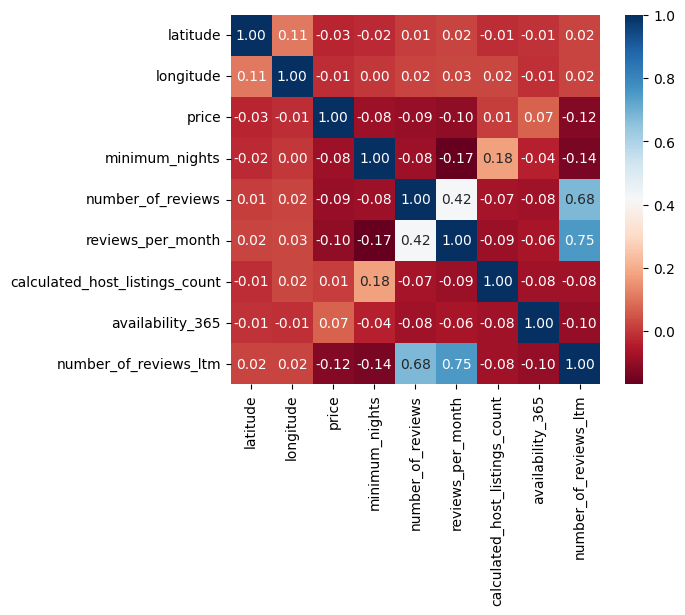

In [17]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)


Na matriz de correlação acima, onde é mais azulado possui correlação positiva, e onde está mais avermelhado possui correlação negativa, conforme a legenda ao lado da matriz.

### **5. Tipo de imóvel mais alugado no Airbnb**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [18]:
# número de cada tipo de propriedade disponível

df_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,19214
Private room,3226
Shared room,189
Hotel room,20


In [19]:
# mostrar a porcentagem de cada tipo de propriedade disponível

print((df_clean.room_type.value_counts() / df_clean.shape[0]).map('{:.2%}'.format))

room_type
Entire home/apt    84.83%
Private room       14.24%
Shared room         0.83%
Hotel room          0.09%
Name: count, dtype: object


### **6. Bairro mais caro do Airbnb de Milão**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [20]:
# ver os preços dos 10 bairros mais caros

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
CANTALUPA,256.000000
DUOMO,240.861869
BRERA,224.644049
SACCO,209.800000
PARCO SEMPIONE,194.906250
GUASTALLA,189.774737
GARIBALDI REPUBBLICA,183.240385
CHIARAVALLE,182.500000
TRE TORRI,174.230769


Como são fornecidas as latitudes e longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

<Axes: xlabel='longitude', ylabel='latitude'>

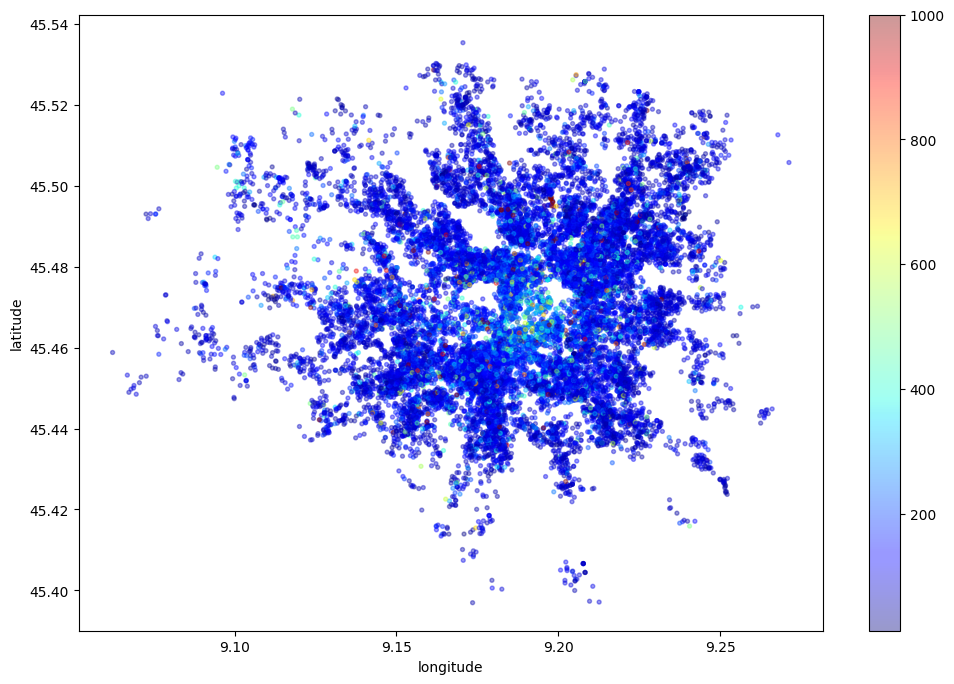

In [21]:
# plotar os imóveis pela latitude-longitude, relacionando com o preço

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))


## Conclusões


Após apenas uma análise superficial da base de dados do Airbnb de Milão, foi possível identificar diversos *outliers*, limpá-los, correlacionar e visualizar os dados de várias formas.
No entanto, essa base de dados é uma versão resumida, para uma análise exploratória mais profunda, seria recomendado utilizar a versão completa, também disponível no site disponibilizado no começo do projeto.